# ***Importing file***

In [ ]:
import pandas as pd
file = "/content/un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df.head()

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."


# ***Importing NLTK***

In [ ]:
import nltk
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'during', "you're", 'now', 'have', 'more', 'whom', 'nor', 'into', "should've", "don't", "won't", 'needn', 'been', "wouldn't", 'are', 'those', 'doesn', 're', 'very', 'ourselves', 'am', 'that', 'with', 'isn', 'doing', 'than', 'him', 'the', 'was', 'between', 'too', 'hasn', 'each', 'down', 'should', 'weren', 'and', 'were', 'because', 'over', 'most', 'how', 'of', 'themselves', 'them', 'don', 'ma', 'through', 't', 'did', 'up', 'about', 'yourself', 've', 'under', 'hers', 'just', 'there', 'she', "aren't", 'below', 'shouldn', "wasn't", 'is', 'against', "you'd", 'theirs', 'its', 'himself', "shan't", 'these', 'his', 'what', 'o', 's', "that'll", 'won', "it's", 'by', 'for', 'while', 'this', 'myself', 'both', 'had', "you've", 'aren', 'mustn', 'yourselves', "hasn't", 'a', 'as', 'i', 'or', 'above', 'd', 'wasn', 'to', "doesn't", "she's", "couldn't", 'why', 'having', 'shan', 'an', "mightn't", 'll', 'few', 'off', "isn't", 'yours', "needn't", 'before', 'being', 'ours', 'until', 'hadn', 'can', 'itself', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import regex as re

# ***PRE-PROCESSING THE PIPELINE***

In [ ]:
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
pipeline = [str.lower, tokenize, remove_stop]


In [ ]:
def prepare(text, pipeline):
    tokens = text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

# ***counting the tokens***

In [ ]:
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index',columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(10)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


# ***Word cloud***

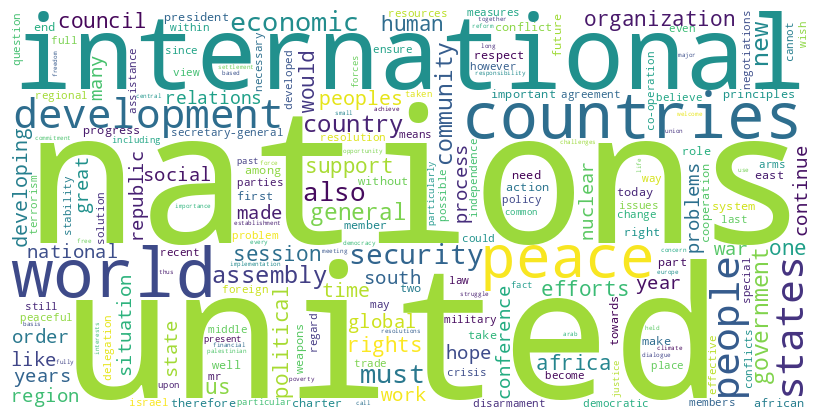

In [ ]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 800, height=400, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# ***TFIDF***

In [ ]:
import numpy as np
def compute_idf(df, column ='tokens', preprocess=None, min_df=1):
 def update(doc):
  tokens = doc if preprocess is None else preprocess(doc)
  counter.update(set(tokens))# count tokens
 counter = Counter()
 df[column].map(update)
# create data frame and compute idf
 idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
 idf_df = idf_df.query('df >= @min_df')
 idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
 idf_df.index.name = 'token'
 return idf_df
idf_df = compute_idf(df)

# ***COMAPRING TF AND IDF***

In [ ]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head(30)

,freq,tfidf
token,,
nations,124508,12649.986284
united,120763,12285.608632
international,117223,12364.276226
world,89421,9503.708982
countries,85734,10888.485986
peace,72625,9094.508519
development,62632,8765.408844
states,59713,8373.451323
people,59338,8891.388053


# ***WORD CLOUD***

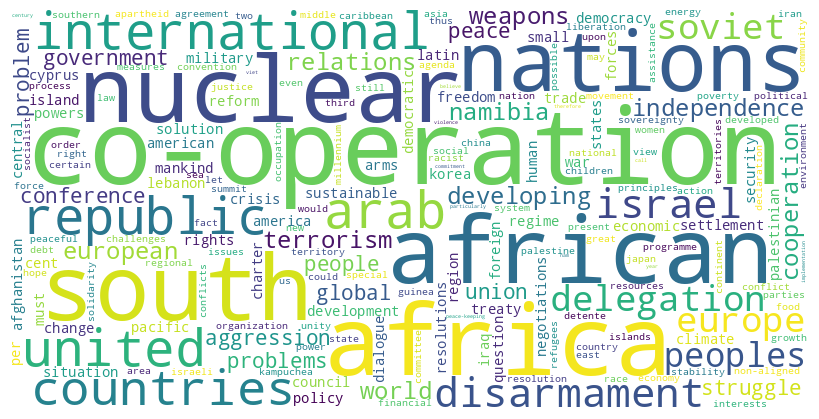

In [ ]:
Wc = WordCloud(background_color='white', width = 300, height=300,margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# ***FUNCTION TO COUNT THE KEYWORDS***

In [ ]:
df['num_tokens'] = df['tokens'].map(len)
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

# ***FUNCTION TO GROUP BY GROUP***

In [ ]:
def count_keywords_by(df, by, keywords, column='tokens'):
    df = df.reset_index(drop=True)
# if the supplied dataframe has gaps inthe index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix,columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    return freq_df.groupby(by=by).sum().sort_values(by)

# ***GRAPH ON THE KEYWORD ACROSS THE YEAR***

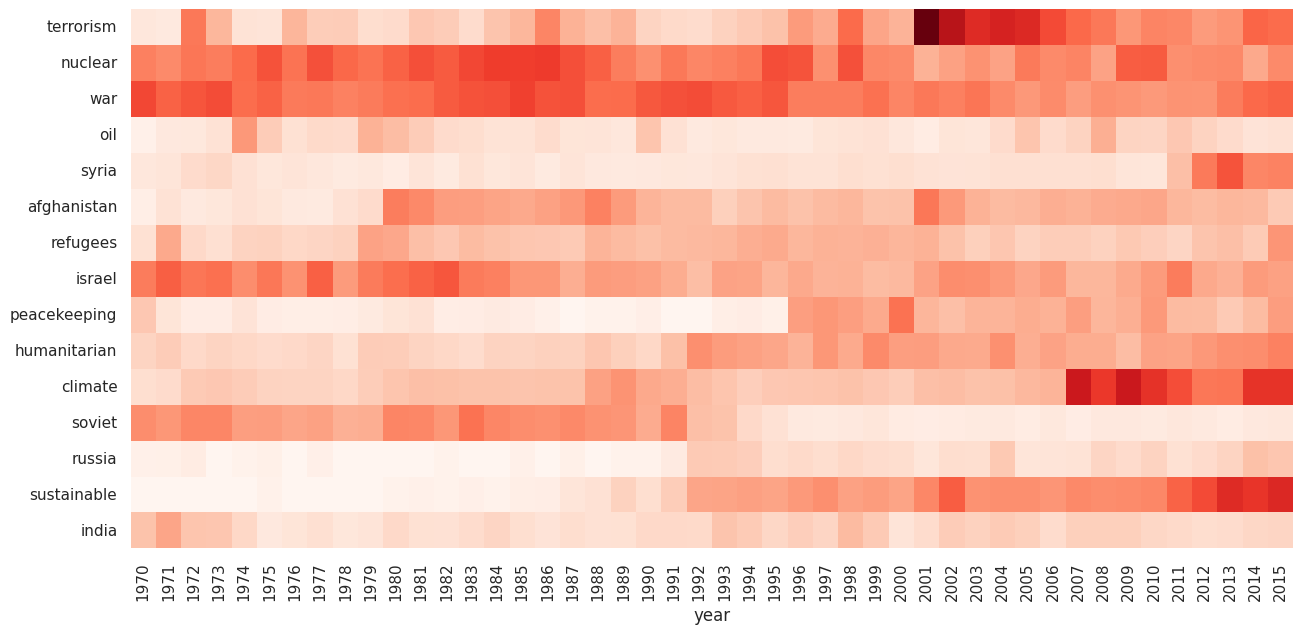

In [ ]:
import seaborn as sns
keywords = ['terrorism', 'nuclear', 'war', 'oil','syria', 'afghanistan', 'refugees', 'israel', 'peacekeeping','humanitarian', 'climate', 'soviet','russia', 'sustainable','india']
freq_df = count_keywords_by(df, by='year', keywords=keywords)
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('year')['num_tokens'].sum(), axis=0)
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)
plt.figure(figsize=(15, 7))
sns.set(font_scale=1)
sns.heatmap(data=freq_df.T,xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)